In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
titanic=sns.load_dataset('titanic')
titanic.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

基本代码：

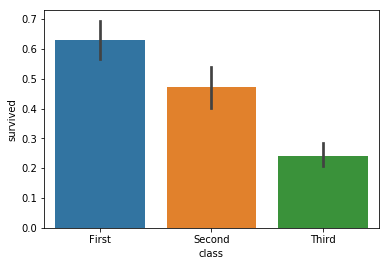

In [2]:
sns.barplot(x='class',y='survived',data=titanic)



<font color=#0099ff size=5 face="黑体"> 01 直方图</font>

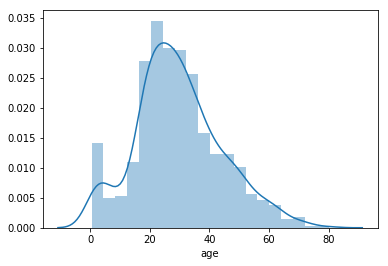

In [3]:
#去除'age'中的缺失值，distplot不能处理缺失数据
age1=titanic['age'].dropna()
sns.distplot(age1)

在上图中，矩形表示在不同年龄段的数量分布，并且 distplot() 默认拟合出了密度曲线，可以看出分布的变化规律。
'kde' 是控制密度估计曲线的参数，默认为 True，不设置会默认显示，如果我们将其设为 False，则不显示密度曲线。
'bins'是控制分布矩形数量的参数，通常我们可以增加其数量，来看到更为丰富的信息。
'reg' 参数用于控制直方图中的边际毛毯，通过控制'reg'是实现毛毯是否显示。

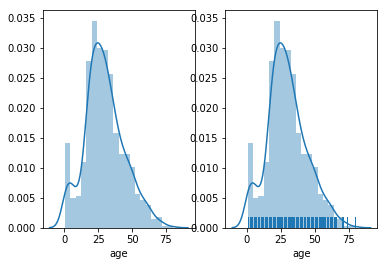

In [4]:
#创建一个一行2列的画布,主要方便对比
fig,axes=plt.subplots(1,2)

#设置'reg'参数，加上观测数值的边际毛毯
#需要用axes[]表示是第几张图，从0开始
sns.distplot(age1,ax=axes[0]) #左图
sns.distplot(age1,rug=True,ax=axes[1]) #右图

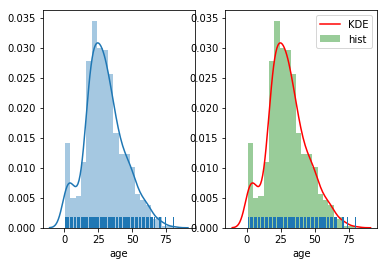

In [5]:
#还可以通过更丰富的参数控制他们展示的细节，这些通过参数 'hist_kws' 、'kde_kws' 、'reg_kws' 来进行设置，
#因为其中涉及到多个参数，参数间用逗号隔开，参数外面用大括号括住。
fig,axes=plt.subplots(1,2) 
sns.distplot(age1,rug=True,ax=axes[0])
sns.distplot(age1,rug=True,
                     hist_kws={'color':'green','label':'hist'},
                     kde_kws={'color':'red','label':'KDE'},
                     ax=axes[1])


<font color=#0099ff size=5 face="黑体"> 02 条形图</font>

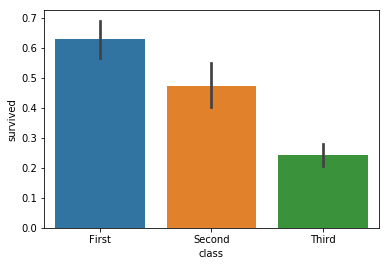

In [6]:
sns.barplot(x='class',y='survived',data=titanic)

barplot() 利用矩阵条的高度反映数值变量的集中趋势，以及使用errorbar功能（差棒图）来估计变量之间的差值统计（置信区间）。需要提醒的是 barplot() 默认展示的是某种变量分布的平均值（可通过参数修改为 max、median 等）。
我们可以通过设置'hue'参数，对x轴的数据进行细分，细分的条件就是'hue'的参数值，比如这里我们的x轴是'class'（仓位等级），我们将其按'sex'（性别）再进行细分。

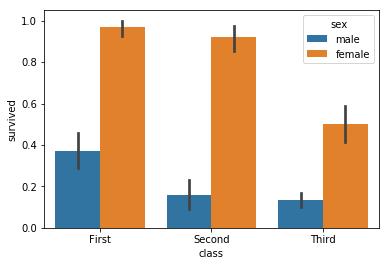

In [7]:
sns.barplot(x='class',y='survived',hue='sex',data=titanic)

<font color=#0099ff size=5 face="黑体"> 03 计数图</font>

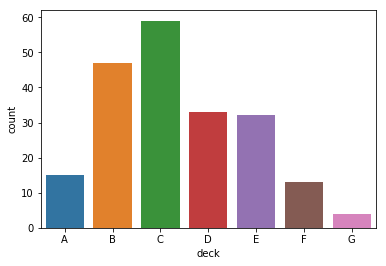

In [8]:
sns.countplot(x='deck',data=titanic)

由此可见，我们选定某个字段，countplot() 会自动帮我们统计该字段下各类别的数目。当然，我们也可以再传入'hue'参数，进行细分，这里我们加入'sex'分类。
如果我们希望调换横纵坐标，也就是类别放于纵坐标，计数值横坐标显示，将x轴换为y轴即可。

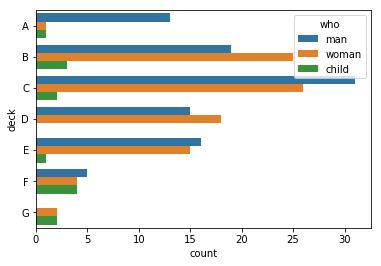

In [9]:
sns.countplot(y='deck',hue='who',data=titanic)

<font color=#0099ff size=5 face="黑体"> 04 散点图</font>

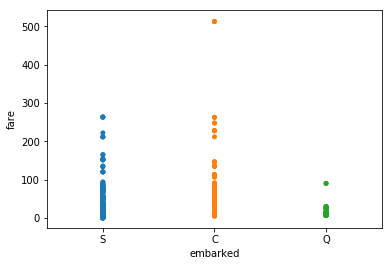

In [3]:
#在seaborn中有两种不同的分类散点图。stripplot() 使用的方法是用少量的随机“抖动”调整分类轴上的点的位置，
#swarmplot() 表示的是带分布属性的散点图。
sns.stripplot(x='embarked',y='fare',data=titanic)

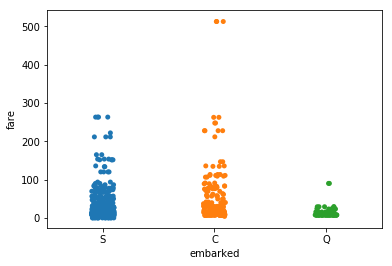

In [4]:
#这里我们可以通过设置'jitter'参数控制抖动的大小。
sns.stripplot(x='embarked',y='fare',
                    data=titanic,jitter=1)

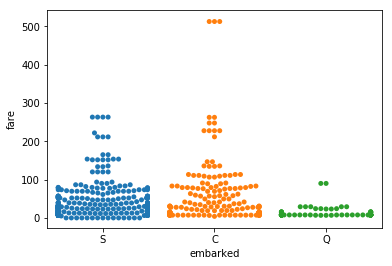

In [5]:
#swarmplot() 方法使用防止它们重叠的算法沿着分类轴调整点。它可以更好地表示观测的分布，它适用于相对较小的数据集。
sns.swarmplot(x='embarked',y='fare',data=titanic)

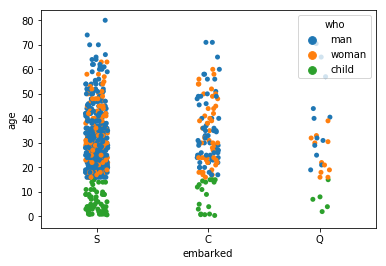

In [6]:
#可以通过'hue'参数，对散点图添加更多细分的维度，Seaborn 中会以颜色来进行区分。
sns.stripplot(x='embarked',y='age',hue='who',jitter=1,data=titanic)

<font color=#0099ff size=5 face="黑体"> 05 箱线图</font>

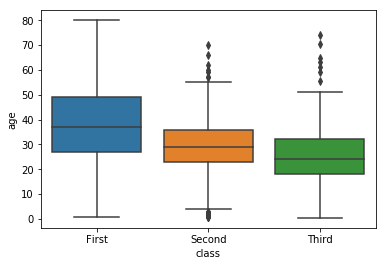

In [7]:
#boxplot（箱线图）是一种用作显示一组数据分散情况的统计图。它能显示出一组数据的最大值、最小值、中位数及上下四分位数。因形状如箱子而得名。
#这意味着箱线图中的每个值对应于数据中的实际观察值。
sns.boxplot(x='class',y='age',data=titanic)

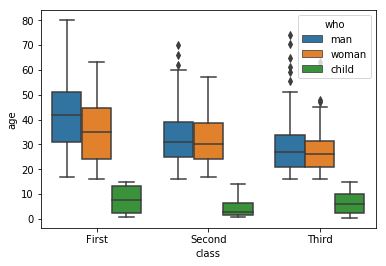

In [8]:
#同样的，可以通过传入'hue'的参数，来对x轴的字段进行细分，这里我们通过'who'来进行分类观察。
sns.boxplot(x='class',y='age',hue='who',data=titanic)

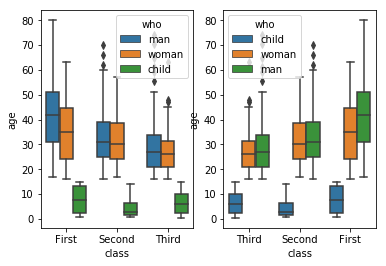

In [9]:
#调节'order' 和 'hue_order' 参数，我们可以控制x轴展示的顺序。
fig,axes=plt.subplots(1,2) 

sns.boxplot(x='class',y='age',hue='who',
                    data=titanic,ax=axes[0])

sns.boxplot(x='class',y='age',hue='who',data=titanic,
                    order=['Third','Second','First'],
                    hue_order=['child','woman','man'],ax=axes[1])

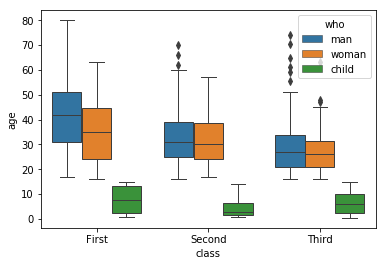

In [10]:
#可以通过'linewidth'参数，控制线条的粗细。我们把'linewidth'参数设为1，就可以看到整体图形的线条变细，你可以根据自己的需要调节。
sns.boxplot(x='class',y='age',hue='who',
                    linewidth=1,data=titanic)

<font color=#0099ff size=5 face="黑体"> 06 小提琴图</font>

小提琴图其实是箱线图与核密度图的结合，箱线图展示了分位数的位置，小提琴图则展示了任意位置的密度，通过小提琴图可以知道哪些位置的密度较高。 

在图中，白点是中位数，黑色盒型的范围是下四分位点到上四分位点，细黑线表示须。外部形状即为核密度估计。

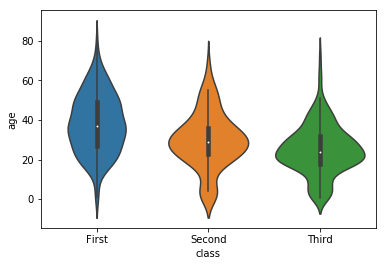

In [11]:
sns.violinplot(x='class',y='age',data=titanic)

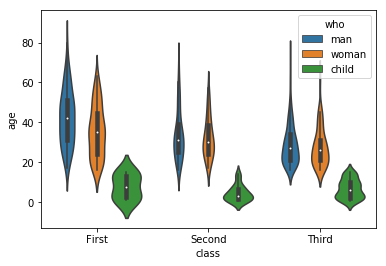

In [12]:
#同样，可以设置'hue'参数，对字段进行细分。
sns.violinplot(x='class',y='age',hue='who',data=titanic)

<font color=#0099ff size=5 face="黑体"> 07 回归图</font>

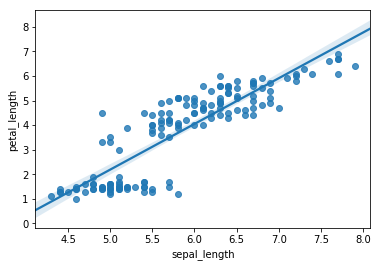

In [3]:
iris=sns.load_dataset('iris')
sns.regplot(x='sepal_length',y='petal_length',data=iris)
#首先来看 'sepal_length' 和 'petal_length' 之间的线性关系。
#图中的点表示实际的数据点，Seaborn 根据这些数据拟合出直线，表示x轴和y轴对应字段之间的线性关系，直线周围的阴影表示置信区间。

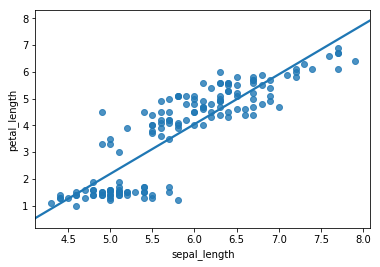

In [4]:
#关于置信区间，可以通过设置'ci'参数控制是否显示。
sns.regplot(x='sepal_length',y='petal_length',data=iris,ci=None)

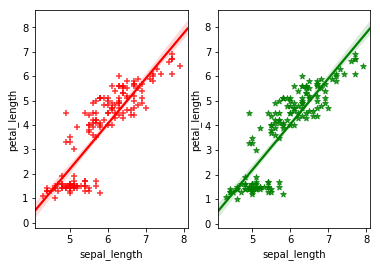

In [5]:
#可以通过'color'和'marker'参数来控制图形的颜色以及数据点的形状。
fig,axes=plt.subplots(1,2) 

sns.regplot(x='sepal_length',y='petal_length',data=iris,
            color='r',marker='+',ax=axes[0])

sns.regplot(x='sepal_length',y='petal_length',data=iris,
            color='g',marker='*',ax=axes[1])

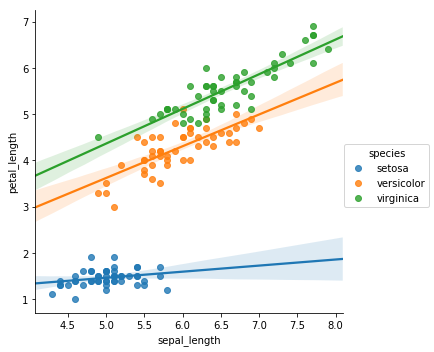

In [6]:
#lmplot() 可以设置hue，进行多个类别的显示，而 regplot() 是不支持的。
#这里我们通过设置hue='species'，来进行分类别地展示。
sns.lmplot(x='sepal_length',y='petal_length',
                 hue='species',data=iris)

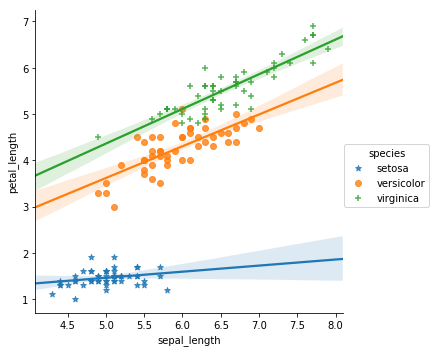

In [7]:
#同样的，我们也可以更改数据点的形状，来进行区分。
sns.lmplot(x='sepal_length',y='petal_length',hue='species',
                    data=iris,markers=['*','o','+'])

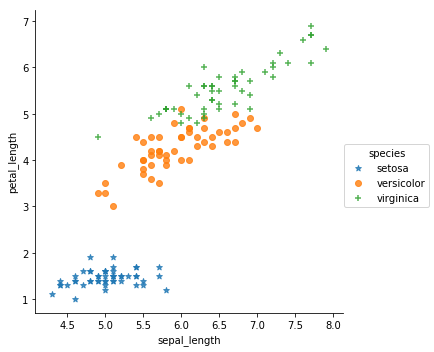

In [8]:
#设置'fit_reg'参数，可以控制是否显示拟合的直线。
sns.lmplot(x='sepal_length',y='petal_length',hue='species',
                data=iris,markers=['*','o','+'],fit_reg=False)

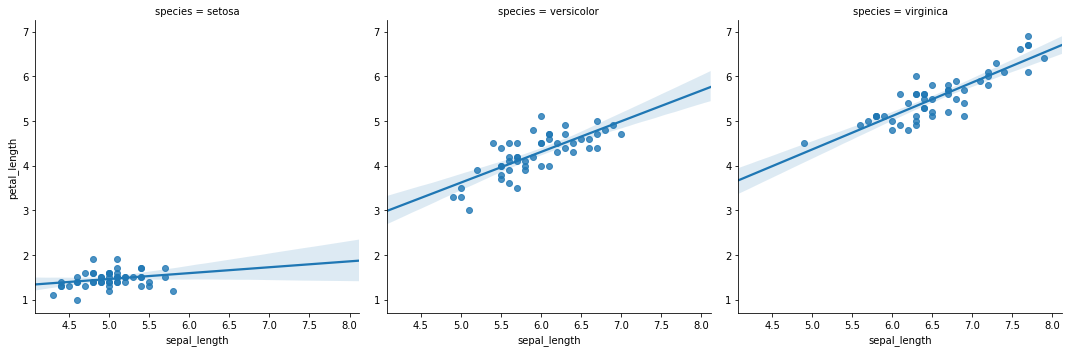

In [9]:
#如果要对不同的类别分开绘制，用'col'参数代替'hue'。
sns.lmplot(x='sepal_length',y='petal_length',
                col='species',data=iris)

<font color=#0099ff size=5 face="黑体"> 08 热力图</font>

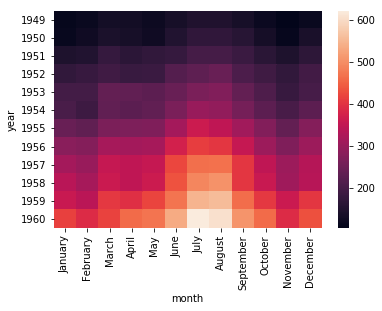

In [11]:
flights = sns.load_dataset("flights")
flights.head(10)
f=flights.pivot('year','month','passengers')
sns.heatmap(f)
#我们以'year'为纵轴，'month'为横轴，'passengers'的值为标准绘制热力图。

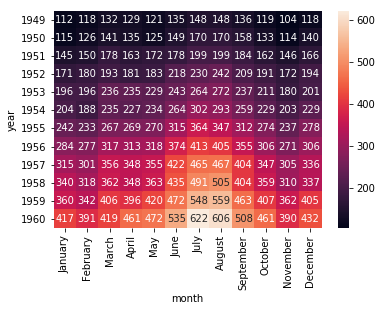

In [12]:
#如果要显示具体的数值，可以通过'annot'参数来控制。
sns.heatmap(f, annot=True,fmt="d")

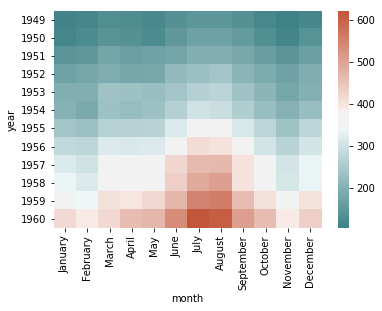

In [13]:
#通过 Seaborn 的调色板控制热力图显示的颜色，调色板在后续会有详细的说明，这里只做演示，示例热力图的颜色调节机制。
cmap = sns.diverging_palette(200,20,sep=20,as_cmap=True)
sns.heatmap(f,cmap=cmap)

<font color=#0099ff size=5 face="黑体"> 09 图形控制的艺术</font>

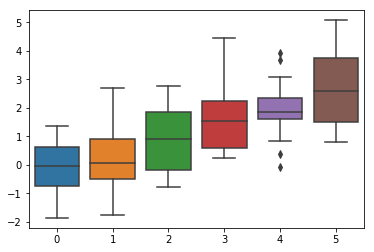

In [15]:
#创建一个20行6列的数据
import numpy as np
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)

Seaborn 中有 white / whitegrid / dark / darkgrid / ticks 几种样式，用 set_style() 函数控制，分别如下：
whitegrid 白色网格背景
white 白色背景（默认）
darkgrid 黑色网格背景
dark 黑色背景
ticks 四周带有刻度的白色背景

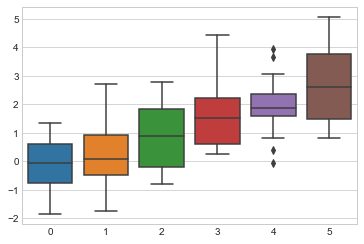

In [16]:
# 设为白色网格背景
sns.set_style("whitegrid")
sns.boxplot(data=data)

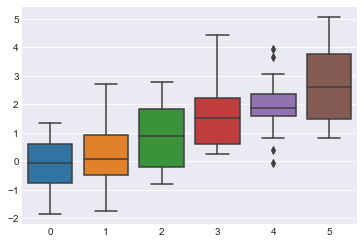

In [17]:
# 设为黑色网格背景
sns.set_style("darkgrid")
sns.boxplot(data=data)

seaborn 中的分类色板，主要用 color_palette() 函数控制，color_palette() 不写参数则显示为 Seaborn 默认颜色。如果需要设置所有图形的颜色，则用 set_palette() 函数定义。
Seaborn 中6个默认的颜色循环主题分别为： deep, muted, pastel, bright, dark, colorblind，下面我们列举演示。

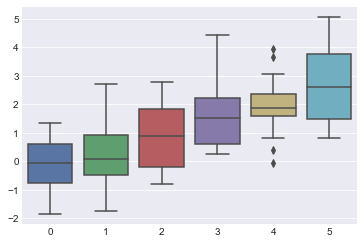

In [18]:
# 设置颜色模式为'deep'
sns.boxplot(data=data,palette=sns.color_palette('deep'))

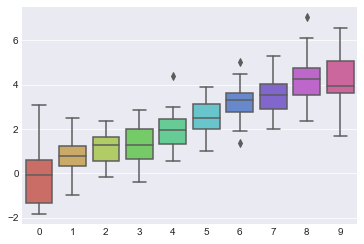

In [19]:
#需要注意的是，除了默认的颜色模式有10中颜色外，其他的颜色模式只有6种颜色，如果需要更多颜色，那么则需要采用hls色彩空间。
#创建一个20行10列的数据'data2'
data2 = np.random.normal(size=(20, 10)) + np.arange(10) / 2  

#利用hls色彩空间进行调色
sns.boxplot(data=data2, palette=sns.color_palette('hls', 10))  

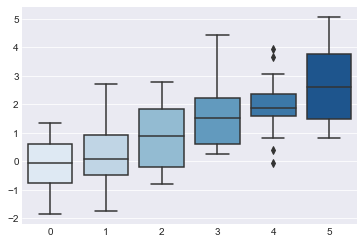

In [20]:
#可以尝试 Reds/Greens，默认颜色由浅到深
sns.boxplot(data=data,palette=sns.color_palette('Blues'))  

In [21]:
#Seaborn 对中文的显示不太友好，如果在遇到乱码问题时，可以加入下面的代码。
# 指定默认字体
mpl.rcParams['font.sans-serif'] = ['SimHei']  

# 解决保存图像是负号'-'显示为方块的问题 
mpl.rcParams['axes.unicode_minus'] = False  

NameError: name 'mpl' is not defined

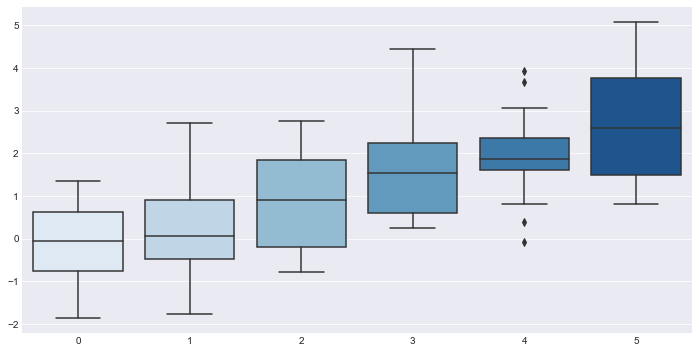

In [22]:
#画出的图形我们需要保存，可以先建立一个画布，设置我们图像的大小，然后将这个画布保存下来。
#设置一个（12，6）的画布
plt.figure(figsize=(12, 6))

#图形绘制代码
sns.boxplot(data=data,palette=sns.color_palette('Blues')) 

#将画布保存为'xiang.png'，还可以保存为jpg、svg格式图片
plt.savefig('xiang.png')